In [9]:
import pickle
import os
import json
from pycocotools import mask
import skimage.io as io
import cv2
import skimage.color as color
import skimage.measure as measure
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import random
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [15, 15]



# check masks
counter = 0
with open('infer_result_sorted' ,'rb') as input_file:
    [pickle.load(input_file) for _ in range(38293)]
#     while True:
#         obj = pickle.load(input_file)
#         f = obj['f']
#         if f == '1526509546842.png':
#             break
    try:
        while True:
            obj = pickle.load(input_file)
            m =obj['m']
            segms = m['cls_segms']
            if not segms:
                # just write it back as is
                continue
            c_alpha = len(segms[1])
            c_beta = len(segms[2])
            
            original_d_a = mask.decode(segms[1])
            original_d_b = mask.decode(segms[2])
            #print(len(original_d_a))
            I = np.zeros((600,800,3)).astype(np.uint8)
            alpha=0.2
            
            cur = original_d_a
            for i in range(cur.shape[-1]):
                colored_mask = color.grey2rgb(cur[..., i]) * [random.randint(150,255),0,0]
                I = cv2.addWeighted(I, 1, colored_mask.astype(np.uint8), 1-alpha, 0)
            
            cur = original_d_b
            for i in range(cur.shape[-1]):
                colored_mask = color.grey2rgb(cur[..., i]) * [0,random.randint(150,255),0]
                I = cv2.addWeighted(I, 1, colored_mask.astype(np.uint8), 1-alpha, 0)
            break
            
            
    except Exception as e:
        raise e

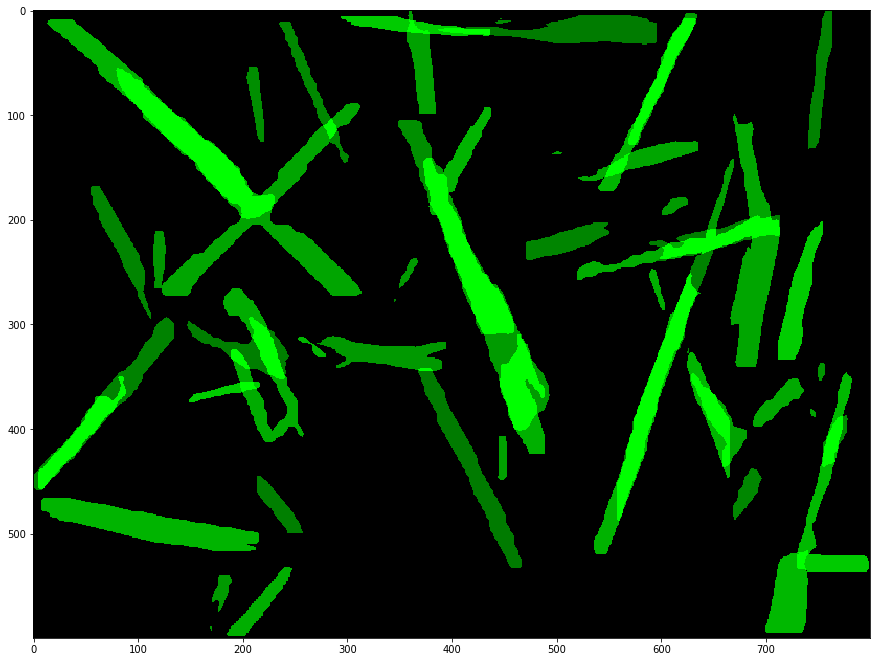

In [10]:
plt.imshow(I)